In [8]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import copy
import seaborn as sns
import time
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
data = pd.read_csv('Cardiotocography.csv')

In [3]:
data

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
0,120,0.000,0.000,0.000,0.000,0.0,0.0,73,0.5,43,...,62,126,2,0,120,137,121,73,1,2
1,132,0.006,0.000,0.006,0.003,0.0,0.0,17,2.1,0,...,68,198,6,1,141,136,140,12,0,1
2,133,0.003,0.000,0.008,0.003,0.0,0.0,16,2.1,0,...,68,198,5,1,141,135,138,13,0,1
3,134,0.003,0.000,0.008,0.003,0.0,0.0,16,2.4,0,...,53,170,11,0,137,134,137,13,1,1
4,132,0.007,0.000,0.008,0.000,0.0,0.0,16,2.4,0,...,53,170,9,0,137,136,138,11,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140,0.000,0.000,0.007,0.000,0.0,0.0,79,0.2,25,...,137,177,4,0,153,150,152,2,0,2
2122,140,0.001,0.000,0.007,0.000,0.0,0.0,78,0.4,22,...,103,169,6,0,152,148,151,3,1,2
2123,140,0.001,0.000,0.007,0.000,0.0,0.0,79,0.4,20,...,103,170,5,0,153,148,152,4,1,2
2124,140,0.001,0.000,0.006,0.000,0.0,0.0,78,0.4,27,...,103,169,6,0,152,147,151,4,1,2


In [26]:
X = data.iloc[:,:-1].values
Y = data.iloc[:, -1].values

In [27]:
# Binarize the output
y = label_binarize(Y, classes=[1,2,3])
n_classes = y.shape[1]

#Splitting data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [28]:
#Feature Scaling
# Applying Feature Scaling for Features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train) #applying on all features
X_test = sc.transform(X_test)

In [67]:

model = keras.Sequential(
    [
        layers.Dense(12, activation="relu", name="hiddenlayer1"),
        layers.Dense(12, activation="relu", name="hiddenlayer1"),
        layers.Dense(3, activation="softmax",name="outputlayer"),

    ]
)
  
start_time = time.time()

model.compile(optimizer="adam" ,loss='categorical_crossentropy' ,metrics=['accuracy'])

model.fit(X_train,y_train,batch_size=62,epochs=100,verbose=0)

y_pred = model.predict(X_test)

# Converting probabilities into label predictions based on highest probability
prediction=[]
for i in range(len(y_pred)):
    prediction.append(y_pred[i].argmax() + 1)
    

Pred = label_binarize(prediction, classes=[1,2,3])

print(accuracy_score(y_test,Pred))

#Confusion Matrix
cm = confusion_matrix(Y_test,prediction)
print(cm)

0.9200626959247649
[[477  15   2]
 [ 22  63   1]
 [  3   8  47]]


# Experiments

In [90]:
def Model(activation):
    act = activation
    model = keras.Sequential(
        [
            layers.Dense(12, activation=act, name="hiddenlayer1"),
            layers.Dense(12, activation=act, name="hiddenlayer2"),
            layers.Dense(3, activation="softmax",name="outputlayer"),

        ]
    )
    
    return model

In [94]:
Act_list = ['linear','relu','tanh',"sigmoid"]
accuracy =[]
extime=[]
for a in Act_list:
    start_time = time.time()
    
    model = Model(a)
    
    model.compile(optimizer='adam' ,loss='categorical_crossentropy' ,metrics=['accuracy'])

    model.fit(X_train,y_train,batch_size=32,epochs=50,verbose=0)
    
    y_pred = model.predict(X_test)
    
    # Converting probabilities into label predictions based on highest probability
    prediction=[]
    for i in range(len(y_pred)):
        prediction.append(y_pred[i].argmax() + 1)


    Pred = label_binarize(prediction, classes=[1,2,3])
    
    extime.append((time.time() - start_time))
    #print(accuracy_score(y_test,Pred))
    accuracy.append(accuracy_score(y_test,Pred))

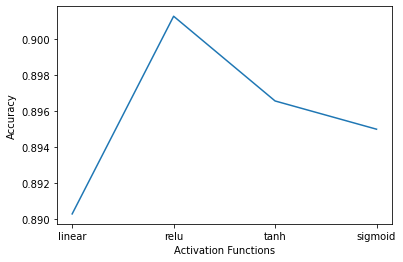

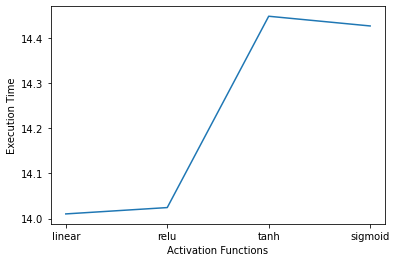

In [95]:
plt.xlabel('Activation Functions')
plt.ylabel('Accuracy')
plt.plot(Act_list,accuracy)
plt.show()

plt.xlabel('Activation Functions')
plt.ylabel('Execution Time')
plt.plot(Act_list,extime)
plt.show()

# Finding best # of hidden layers

In [113]:
def Model():
    model = keras.Sequential(
        [
            layers.Dense(6, activation="relu", name="hiddenlayer1"),
            layers.Dense(6, activation="relu", name="hiddenlayer1"),
            layers.Dense(6, activation="relu", name="hiddenlayer1"),
            layers.Dense(6, activation="relu", name="hiddenlayer1"),
            layers.Dense(6, activation="relu", name="hiddenlayer1"),
            layers.Dense(3, activation="softmax",name="outputlayer"),

        ]
    )
    
    return model

In [114]:


model = Model()
    
model.compile(optimizer='adam' ,loss='categorical_crossentropy' ,metrics=['accuracy'])

model.fit(X_train,y_train,batch_size=32,epochs=50,verbose=0)

y_pred = model.predict(X_test)

# Converting probabilities into label predictions based on highest probability
prediction=[]
for i in range(len(y_pred)):
    prediction.append(y_pred[i].argmax() + 1)


Pred = label_binarize(prediction, classes=[1,2,3])

extime.append((time.time() - start_time))
#print(accuracy_score(y_test,Pred))
accuracy.append(accuracy_score(y_test,Pred))

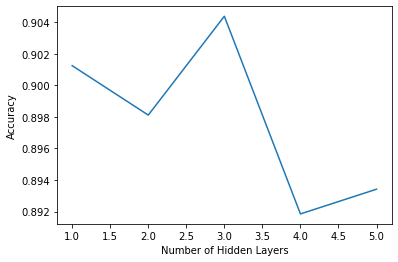

In [115]:
dl=list(range(1,6))
plt.xlabel('Number of Hidden Layers')
plt.ylabel('Accuracy')
plt.plot(dl,accuracy)
plt.show()

# Finding best # Neurons in each hidden layer

In [116]:
def Model(n):
    model = keras.Sequential(
        [
            layers.Dense(n, activation="relu", name="hiddenlayer1"),
            layers.Dense(n, activation="relu", name="hiddenlayer2"),
            layers.Dense(n, activation="relu", name="hiddenlayer3"),
            layers.Dense(3, activation="softmax",name="outputlayer"),

        ]
    )
    
    return model

In [117]:
n_list = [2,6,8,12,15]
accuracy =[]
extime=[]
for n in n_list:
    start_time = time.time()
    
    model = Model(n)
    
    model.compile(optimizer='adam' ,loss='categorical_crossentropy' ,metrics=['accuracy'])

    model.fit(X_train,y_train,batch_size=32,epochs=50,verbose=0)
    
    y_pred = model.predict(X_test)
    
    # Converting probabilities into label predictions based on highest probability
    prediction=[]
    for i in range(len(y_pred)):
        prediction.append(y_pred[i].argmax() + 1)


    Pred = label_binarize(prediction, classes=[1,2,3])
    
    extime.append((time.time() - start_time))
    #print(accuracy_score(y_test,Pred))
    accuracy.append(accuracy_score(y_test,Pred))

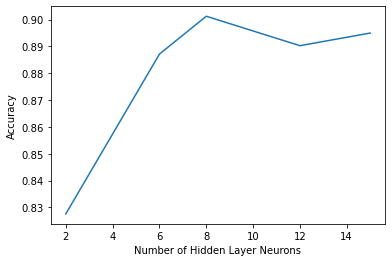

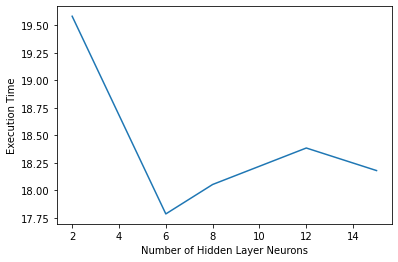

In [118]:
plt.xlabel('Number of Hidden Layer Neurons')
plt.ylabel('Accuracy')
plt.plot(n_list,accuracy)
plt.show()

plt.xlabel('Number of Hidden Layer Neurons')
plt.ylabel('Execution Time')
plt.plot(n_list,extime)
plt.show()

# Finding best optimizer

In [119]:
def Model():
    model = keras.Sequential(
        [
            layers.Dense(8, activation="relu", name="hiddenlayer1"),
            layers.Dense(8, activation="relu", name="hiddenlayer2"),
            layers.Dense(8, activation="relu", name="hiddenlayer3"),
            layers.Dense(3, activation="softmax",name="outputlayer"),

        ]
    )
    
    return model

In [122]:
optimizers = ['adam','sgd','adamax','rmsprop']
accuracy =[]
extime=[]
for opt in optimizers:
    start_time = time.time()
    
    model = Model()
    
    model.compile(optimizer=opt ,loss='categorical_crossentropy' ,metrics=['accuracy'])

    model.fit(X_train,y_train,batch_size=32,epochs=50,verbose=0)
    
    y_pred = model.predict(X_test)
    
    # Converting probabilities into label predictions based on highest probability
    prediction=[]
    for i in range(len(y_pred)):
        prediction.append(y_pred[i].argmax() + 1)


    Pred = label_binarize(prediction, classes=[1,2,3])
    
    extime.append((time.time() - start_time))
    #print(accuracy_score(y_test,Pred))
    accuracy.append(accuracy_score(y_test,Pred))

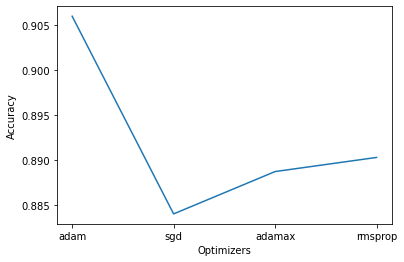

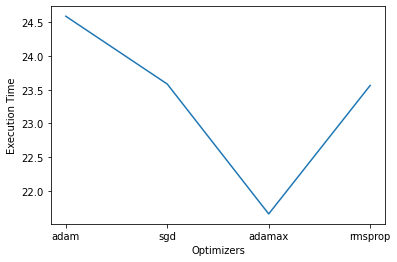

In [123]:
plt.xlabel('Optimizers')
plt.ylabel('Accuracy')
plt.plot(optimizers,accuracy)
plt.show()

plt.xlabel('Optimizers')
plt.ylabel('Execution Time')
plt.plot(optimizers,extime)
plt.show()

# Best Epochs

In [124]:
Epochs = [10,25,50,100,150]
accuracy =[]
extime=[]
for e in Epochs:
    start_time = time.time()
    
    model = Model()
    
    model.compile(optimizer="adam" ,loss='categorical_crossentropy' ,metrics=['accuracy'])

    model.fit(X_train,y_train,batch_size=32,epochs=e,verbose=0)
    
    y_pred = model.predict(X_test)
    
    # Converting probabilities into label predictions based on highest probability
    prediction=[]
    for i in range(len(y_pred)):
        prediction.append(y_pred[i].argmax() + 1)


    Pred = label_binarize(prediction, classes=[1,2,3])
    
    extime.append((time.time() - start_time))
    #print(accuracy_score(y_test,Pred))
    accuracy.append(accuracy_score(y_test,Pred))

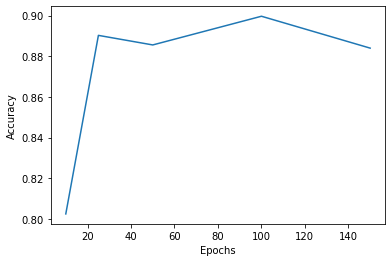

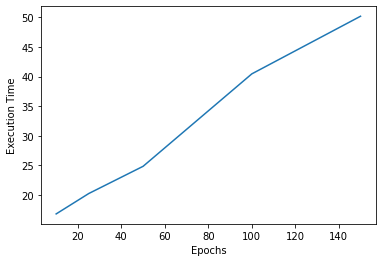

In [125]:
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(Epochs,accuracy)
plt.show()

plt.xlabel('Epochs')
plt.ylabel('Execution Time')
plt.plot(Epochs,extime)
plt.show()

# Best Batch Size with Epochs = 100

In [126]:
Batch_size = [32,64,128,256]
accuracy =[]
extime=[]
for b in Batch_size:
    start_time = time.time()
    
    model = Model()
    
    model.compile(optimizer="adam" ,loss='categorical_crossentropy' ,metrics=['accuracy'])

    model.fit(X_train,y_train,batch_size=b,epochs=100,verbose=0)
    
    y_pred = model.predict(X_test)
    
    # Converting probabilities into label predictions based on highest probability
    prediction=[]
    for i in range(len(y_pred)):
        prediction.append(y_pred[i].argmax() + 1)


    Pred = label_binarize(prediction, classes=[1,2,3])
    
    extime.append((time.time() - start_time))
    #print(accuracy_score(y_test,Pred))
    accuracy.append(accuracy_score(y_test,Pred))

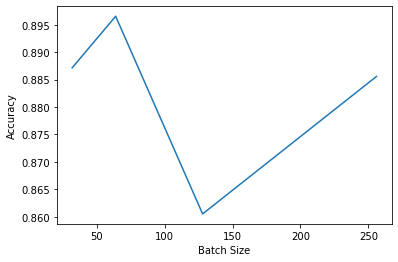

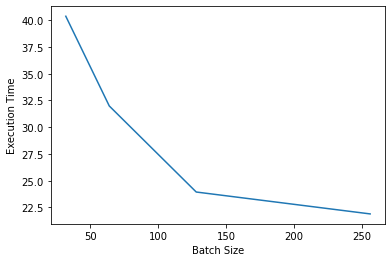

In [127]:
plt.xlabel('Batch Size')
plt.ylabel('Accuracy')
plt.plot(Batch_size,accuracy)
plt.show()

plt.xlabel('Batch Size')
plt.ylabel('Execution Time')
plt.plot(Batch_size,extime)
plt.show()

# Best Model

In [197]:
model = keras.Sequential(
        [
            layers.Dense(8, activation="relu", name="hiddenlayer1"),
            layers.Dense(8, activation="relu", name="hiddenlayer2"),
            layers.Dense(8, activation="relu", name="hiddenlayer3"),
            layers.Dense(3, activation="softmax",name="outputlayer"),

        ]
    )



start_time = time.time()
    
model = Model()

model.compile(optimizer="adam" ,loss='categorical_crossentropy' ,metrics=['accuracy'])

model.fit(X_train,y_train,batch_size=64,epochs=100,verbose=0)

y_pred = model.predict(X_test)

# Converting probabilities into label predictions based on highest probability
prediction=[]
for i in range(len(y_pred)):
    prediction.append(y_pred[i].argmax() + 1)


Pred = label_binarize(prediction, classes=[1,2,3])

print("Time: ",time.time() - start_time)
#print(accuracy_score(y_test,Pred))
print("Accuracy: ",accuracy_score(y_test,Pred))

#Confusion Matrix
cm = confusion_matrix(Y_test,prediction)
print("\nConfusion Matrix")
print(cm)

Time:  35.953739166259766
Accuracy:  0.8871473354231975

Confusion Matrix
[[464  27   3]
 [ 27  55   4]
 [  3   8  47]]


# Cross Validation

In [175]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold

In [176]:
def Model():
    model = keras.Sequential(
        [
            layers.Dense(8, activation="relu", name="hiddenlayer1"),
            layers.Dense(8, activation="relu", name="hiddenlayer2"),
            layers.Dense(8, activation="relu", name="hiddenlayer3"),
            layers.Dense(3, activation="softmax",name="outputlayer"),

        ]
    )
    
    model.compile(optimizer="adam" ,loss='categorical_crossentropy' ,metrics=['accuracy'])
    
    return model

In [177]:
estimator = KerasClassifier(build_fn=Model, epochs=100, batch_size=64, verbose=0)
kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X_t, y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 91.11% (2.49%)


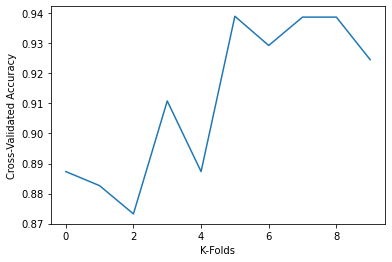

In [180]:
plt.plot(results)
plt.xlabel('K-Folds')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

# K-NN Model

In [131]:
#Implemeting K-NN model
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2) #minkowski and p=2 means we are using eucledian distance
classifier.fit(X_train,Y_train)

KNeighborsClassifier()

In [132]:
#Predicting for test data
y_pred = classifier.predict(X_test)

#Confusion Matrix
cm = confusion_matrix(Y_test,y_pred)
print(cm)
accuracy_score(Y_test,y_pred)

[[479  12   3]
 [ 36  49   1]
 [  5   8  45]]


0.8981191222570533

# Best Distance  Metric

In [134]:
pvalue =[1,2,3]
accuracy = []
for pval in pvalue:
    classifier = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=pval) 
    classifier.fit(X_train,Y_train)
    
    y_pred = classifier.predict(X_test)
    
    accuracy.append(accuracy_score(Y_test,y_pred))
    

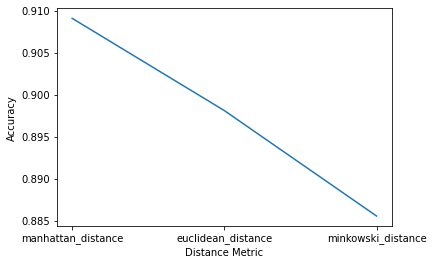

In [136]:
distance = ['manhattan_distance','euclidean_distance','minkowski_distance']
plt.xlabel('Distance Metric')
plt.ylabel('Accuracy')
plt.plot(distance,accuracy)
plt.show()

# Best N

In [184]:
nvalue =range(1,31)
accuracy = []
for n in nvalue:
    classifier = KNeighborsClassifier(n_neighbors=n,metric='minkowski',p=1) 
    classifier.fit(X_train,Y_train)
    
    y_pred = classifier.predict(X_test)
    
    accuracy.append(accuracy_score(Y_test,y_pred))

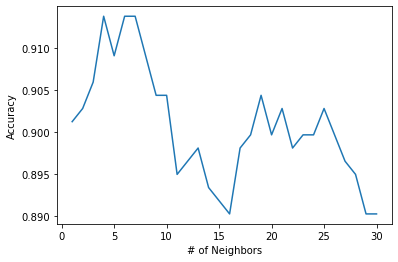

In [185]:
plt.xlabel('# of Neighbors')
plt.ylabel('Accuracy')
plt.plot(nvalue,accuracy)
plt.show()

# Best Model

In [188]:
classifier = KNeighborsClassifier(n_neighbors=4,metric='minkowski',p=1) 
classifier.fit(X_train,Y_train)
    
y_pred = classifier.predict(X_test)
    

print("Accuracy:",accuracy_score(Y_test,y_pred))
#Confusion Matrix
cm = confusion_matrix(Y_test,y_pred)
print("\nConfusion Matrix")
print(cm)

Accuracy: 0.9137931034482759

Confusion Matrix
[[489   5   0]
 [ 33  50   3]
 [  5   9  44]]


# Cross Validation

In [144]:
#Feature Scaling
# Applying Feature Scaling for Features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_t = sc.fit_transform(X) #applying on all features


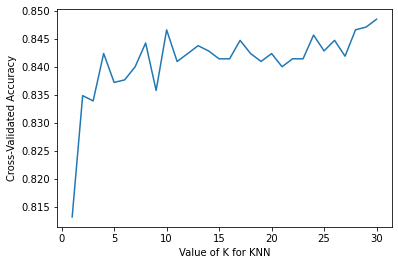

In [191]:
import matplotlib.pyplot as plt 
from sklearn.model_selection import cross_val_score
%matplotlib inline
# choose k between 1 to 31
k_range = range(1, 31)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=1)
    scores = cross_val_score(knn, X_t, Y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [195]:
k_scores[9]

0.8466294623084419